In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys
from datetime import datetime

In [4]:
sys.path.append('/content/drive/MyDrive/Code.Hub_Data_Science /Project_Regen')

In [5]:
import FuncUtil as fu

In [6]:
%matplotlib inline

In [7]:
listings = pd.read_csv('/content/drive/MyDrive/Code.Hub_Data_Science /Project_Regen/listings.csv')

In [8]:
listings.head(5)

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2818,https://www.airbnb.com/rooms/2818,20201009050447,2020-10-11,Quiet Garden View Room & Super Fast WiFi,Quiet Garden View Room & Super Fast WiFi<br />...,"Indische Buurt (""Indies Neighborhood"") is a ne...",https://a0.muscache.com/pictures/10272854/8dcc...,3159,https://www.airbnb.com/users/show/3159,Daniel,2008-09-24,"Amsterdam, Noord-Holland, The Netherlands","Upon arriving in Amsterdam, one can imagine as...",NaN,NaN,100%,t,https://a0.muscache.com/im/users/3159/profile_...,https://a0.muscache.com/im/users/3159/profile_...,Indische Buurt,1.0,1.0,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,t,"Amsterdam, North Holland, Netherlands",Oostelijk Havengebied - Indische Buurt,NaN,52.36575,4.94142,Private room in apartment,Private room,2,NaN,1.5 shared baths,1.0,2.0,"[""Laptop-friendly workspace"", ""Coffee maker"", ...",$59.00,3,1125,3,3,1125,1125,3.0,1125.0,NaN,t,0,0,0,0,2020-10-11,278,6,0,2009-03-30,2020-02-14,98.0,10.0,10.0,10.0,10.0,9.0,10.0,NaN,t,1,0,1,0,1.98
1,20168,https://www.airbnb.com/rooms/20168,20201009050447,2020-10-11,Studio with private bathroom in the centre 1,17th century Dutch townhouse in the heart of t...,Located just in between famous central canals....,https://a0.muscache.com/pictures/69979628/fd6a...,59484,https://www.airbnb.com/users/show/59484,Alexander,2009-12-02,"Amsterdam, Noord-Holland, The Netherlands",+ (Phone number hidden by Airbnb),NaN,NaN,100%,f,https://a0.muscache.com/im/pictures/user/65092...,https://a0.muscache.com/im/pictures/user/65092...,Grachtengordel,2.0,2.0,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,t,"Amsterdam, North Holland, Netherlands",Centrum-Oost,NaN,52.36424,4.89396,Private room in townhouse,Private room,2,NaN,1 private bath,1.0,1.0,"[""Laptop-friendly workspace"", ""TV"", ""Carbon mo...",$236.00,1,365,4,4,60,365,4.0,250.7,NaN,t,0,0,0,0,2020-10-11,340,48,0,2010-03-02,2020-04-09,89.0,10.0,10.0,10.0,10.0,10.0,9.0,NaN,t,2,0,2,0,2.63
2,25428,https://www.airbnb.com/rooms/25428,20201009050447,2020-10-11,Lovely apt in City Centre (w.lift) near Jordaan,Lovely apt in Centre ( lift & fireplace) near ...,NaN,https://a0.muscache.com/pictures/138431/7079a9...,56142,https://www.airbnb.com/users/show/56142,Joan,2009-11-20,"New York, New York, United States","We are a retired couple who live in NYC, and h...",within a few hours,100%,39%,t,https://a0.muscache.com/im/users/56142/profile...,https://a0.muscache.com/im/users/56142/profile...,Grachtengordel,2.0,2.0,"['email', 'phone', 'reviews']",t,f,NaN,Centrum-West,NaN,52.37297,4.88339,Entire apartment,Entire home/apt,3,NaN,1 bath,1.0,1.0,"[""Laptop-friendly workspace"", ""Kitchen"", ""Dish...",$125.00,14,180,14,14,180,180,14.0,180.0,

In [7]:
pd.options.display.max_rows = 4000
pd.options.display.max_columns = 4000

In [8]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18782 entries, 0 to 18781
Data columns (total 74 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            18782 non-null  int64  
 1   listing_url                                   18782 non-null  object 
 2   scrape_id                                     18782 non-null  int64  
 3   last_scraped                                  18782 non-null  object 
 4   name                                          18749 non-null  object 
 5   description                                   18491 non-null  object 
 6   neighborhood_overview                         12451 non-null  object 
 7   picture_url                                   18782 non-null  object 
 8   host_id                                       18782 non-null  int64  
 9   host_url                                      18782 non-null 

In [9]:
null_values_percentage = listings.isna().mean()*100
null_values_percentage[null_values_percentage>0]

name                              0.175700
description                       1.549356
neighborhood_overview            33.707805
host_name                         0.298158
host_since                        0.298158
host_location                     0.447237
host_about                       42.460867
host_response_time               67.133426
host_response_rate               67.133426
host_acceptance_rate             44.068789
host_is_superhost                 0.298158
host_thumbnail_url                0.298158
host_picture_url                  0.298158
host_neighbourhood               33.175381
host_listings_count               0.298158
host_total_listings_count         0.298158
host_has_profile_pic              0.298158
host_identity_verified            0.298158
neighbourhood                    33.707805
neighbourhood_group_cleansed    100.000000
bathrooms                       100.000000
bathrooms_text                    0.026621
bedrooms                          5.260356
beds       

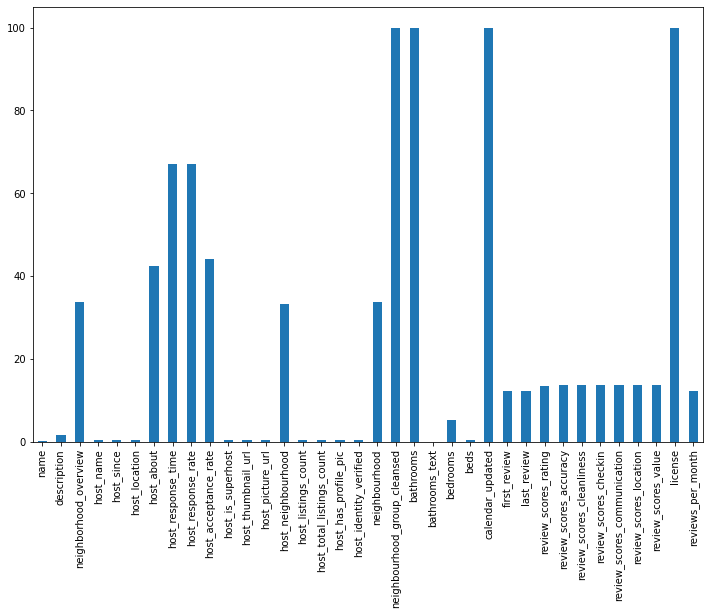

In [10]:
fig = plt.figure(figsize=(12,8))
null_values_percentage[null_values_percentage>0].plot.bar()

## Dropping initial columns


In [11]:
drop_columns = ['scrape_id',
                'listing_url',
                'last_scraped',
                'name',
                'description',
                'neighborhood_overview',
                'picture_url',
                'host_url',
                'host_id',
                'host_name',
                'host_location',
                'host_about',
                'host_response_time',
                'host_response_rate',
                'host_acceptance_rate',
                'host_thumbnail_url',
                'host_picture_url',
                'host_neighbourhood',
                'host_total_listings_count',
                'host_verifications',
                'host_has_profile_pic',
                'neighbourhood',
                'neighbourhood_group_cleansed',
                'bathrooms',
                'minimum_minimum_nights',
                'maximum_minimum_nights',
                'minimum_maximum_nights',
                'maximum_maximum_nights',
                'minimum_nights_avg_ntm', 
                'maximum_nights_avg_ntm',
                'calendar_updated',
                'calendar_last_scraped',
                'license']

In [12]:
listings = listings.drop(drop_columns,axis=1)

In [13]:
listings.head(5)

,id,host_since,host_is_superhost,host_listings_count,host_identity_verified,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2818,2008-09-24,t,1.0,t,Oostelijk Havengebied - Indische Buurt,52.36575,4.94142,Private room in apartment,Private room,2,1.5 shared baths,1.0,2.0,"[""Laptop-friendly workspace"", ""Coffee maker"", ...",$59.00,3,1125,t,0,0,0,0,278,6,0,2009-03-30,2020-02-14,98.0,10.0,10.0,10.0,10.0,9.0,10.0,t,1,0,1,0,1.98
1,20168,2009-12-02,f,2.0,t,Centrum-Oost,52.36424,4.89396,Private room in townhouse,Private room,2,1 private bath,1.0,1.0,"[""Laptop-friendly workspace"", ""TV"", ""Carbon mo...",$236.00,1,365,t,0,0,0,0,340,48,0,2010-03-02,2020-04-09,89.0,10.0,10.0,10.0,10.0,10.0,9.0,t,2,0,2,0,2.63
2,25428,2009-11-20,t,2.0,f,Centrum-West,52.37297,4.88339,Entire apartment,Entire home/apt,3,1 bath,1.0,1.0,"[""Laptop-friendly workspace"", ""Kitchen"", ""Dish...",$125.00,14,180,t,0,0,4,58,5,2,0,2018-01-21,2020-02-09,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f,1,1,0,0,0.15
3,27886,2010-03-23,t,1.0,t,Centrum-West,52.38761,4.89188,Private room in houseboat,Private room,2,1.5 baths,1.0,1.0,"[""Laptop-friendly workspace"", ""Coffee maker"", ...",$138.00,2,730,t,21,51,75,158,219,16,0,2012-01-09,2020-07-25,99.0,10.0,10.0,10.0,10.0,10.0,10.0,t,1,0,1,0,2.05
4,28871,2010-05-13,t,2.0,t,Centrum-West,52.36719,4.89092,Private room in apartment,Private room,2,1 shared bath,1.0,1.0,"[""Carbon monoxide alarm"", ""Private entrance"", ...",$75.00,2,1825,t,28,56,82,340,336,32,2,2010-08-22,2020-09-20,97.0,10.0,10.0,10.0,10.0,10.0,10.0,f,2,0,2,0,2.72


In [14]:
listings.shape

(18782, 41)

In [15]:
listings.columns

Index(['id', 'host_since', 'host_is_superhost', 'host_listings_count',
       'host_identity_verified', 'neighbourhood_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'has_availability',
       'availability_30', 'availability_60', 'availability_90',
       'availability_365', 'number_of_reviews', 'number_of_reviews_ltm',
       'number_of_reviews_l30d', 'first_review', 'last_review',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'instant_bookable',
       'calculated_host_listings_count',
       'calculated_host_listings_count_entire_homes',
       'calculated_host_listings_count_private_rooms',
       'calculated_host_listings_count_shared_rooms', 'reviews_per_month'],
   

# Cleaning And Null Values

**Host Since**

In [16]:
listings['host_since']

0        2008-09-24
1        2009-12-02
2        2009-11-20
3        2010-03-23
4        2010-05-13
            ...    
18777    2019-11-20
18778    2011-08-12
18779    2015-11-04
18780    2016-06-01
18781    2020-10-08
Name: host_since, Length: 18782, dtype: object

In [17]:
listings['host_since'] = pd.to_datetime(listings['host_since'])

In [18]:
listings['host_since']

0       2008-09-24
1       2009-12-02
2       2009-11-20
3       2010-03-23
4       2010-05-13
           ...    
18777   2019-11-20
18778   2011-08-12
18779   2015-11-04
18780   2016-06-01
18781   2020-10-08
Name: host_since, Length: 18782, dtype: datetime64[ns]

In [19]:
listings['host_active_for'] = (datetime(2021, 5, 27) - listings['host_since']).astype('timedelta64[D]')

In [20]:
listings['host_active_for'].isna().sum()

56

In [21]:
listings.rename({'host_active_for': 'host_active_for(days)'}, axis=1, inplace=True)

In [22]:
listings['host_active_for(days)'].isna().sum()

56

In [23]:
listings['host_active_for(days)'] = listings['host_active_for(days)'].fillna(listings['host_active_for(days)'].median()) 

In [24]:
blistings['host_active_for(days)'].isna().sum()

0

In [25]:
listings['host_active_for(days)'].median()

2279.0

In [26]:
listings['host_active_for(days)'].mean()

2217.121818762645

**host_is_superhost/ host_identity_verified** 

In [27]:
listings.replace({'f': 0, 't': 1}, inplace=True)

In [28]:
for i in ['host_is_superhost', 'host_identity_verified']:
  print('The missing values of column {} are: {}'.format(i,listings[i].isna().sum()))

The missing values of column host_is_superhost are: 56
The missing values of column host_identity_verified are: 56


In [29]:
listings[listings['host_is_superhost'].isna()] # φαίνεται ότι τα samples είναι ίδια με τα missing values πιθανή διαγραφή γραμμών

,id,host_since,host_is_superhost,host_listings_count,host_identity_verified,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,host_active_for(days)
226,571029,NaT,NaN,NaN,NaN,De Baarsjes - Oud-West,52.36840,4.86064,Entire apartment,Entire home/apt,4,1 bath,2.0,2.0,"[""Laptop-friendly workspace"", ""Kitchen"", ""Dish...",$150.00,3,1124,1,0,0,0,0,10,0,0,2012-08-13,2018-05-27,98.0,10.0,9.0,10.0,10.0,9.0,9.0,0,52,52,0,0,0.10,2279.0
746,1364081,NaT,NaN,NaN,NaN,Oostelijk Havengebied - Indische Buurt,52.36304,4.93673,Entire apartment,Entire home/apt,3,1 bath,1.0,2.0,"[""Laptop-friendly workspace"", ""Kitchen"", ""Dish...",$135.00,3,1124,1,0,0,0,0,56,0,0,2013-08-31,2018-08-27,88.0,9.0,8.0,9.0,9.0,9.0,9.0,0,52,52,0,0,0.65,2279.0
966,1849795,NaT,NaN,NaN,NaN,Centrum-West,52.37375,4.87929,Entire apartment,Entire home/apt,2,1 bath,1.0,1.0,"[""Laptop-friendly workspace"", ""Kitchen"", ""Dish...",$126.00,3,1125,1,0,0,0,0,39,0,0,2013-11-03,2018-12-16,91.0,9.0,9.0,10.0,9.0,10.0,9.0,0,52,52,0,0,0.46,2279.0
1496,3159545,NaT,NaN,NaN,NaN,De Pijp - Rivierenbuurt,52.35580,4.89884,Entire apartment,Entire home/apt,2,1 bath,NaN,1.0,"[""Essentials"", ""Iron"", ""Carbon monoxide alarm""...",$125.00,3,1125,1,0,0,0,0,12,0,0,2015-10-19,2018-10-22,96.0,10.0,9.0,10.0,10.0,10.0,10.0,0,52,52,0,0,0.20,2279.0
1815,3781081,NaT,NaN,NaN,NaN,Oostelijk Havengebied - Indische Buurt,52.36417,4.94328,Entire apartment,Entire home/apt,4,1 bath,3.0,2.0,"[""Laptop-friendly workspace"", ""Kitchen"", ""Dish...",$150.00,3,1125,1,0,0,0,0,5,0,0,2015-07-20,2018-07-26,96.0,10.0,10.0,10.0,10.0,10.0,9.0,0,52,52,0,0,0.08,2279.0
2167,4609694,NaT,NaN,NaN,NaN,Centrum-Oost,52.37220,4.93064,Entire apartment,Entire home/apt,2,1 bath,1.0,1.0,"[""Laptop-friendly workspace"", ""Kitchen"", ""Wifi...",$139.00,4,1125,1,0,0,0,0,25,0,0,2014-12-28,2019-01-07,96.0,10.0,10.0,10.0,10.0,9.0,9.0,0,52,52,0,0,0.35,2279.0
2652,5879421,NaT,NaN,NaN,NaN,De Pijp - Rivierenbuurt,52.35501,4.89389,Entire apartment,Entire home/apt,2,1 bath,1.0,1.0,"[""Laptop-friendly workspace"", ""Kitchen"", ""Dish...",$125.00,3,1125,1,0,0,0,0,32,0,0,2015-04-20,2018-09-15,95.0,10.0,10.0,9.0,10.0,10.0,9.0,0,52,52,0,0,0.48,2279.0
2901,6345018,NaT,NaN,NaN,NaN,Centrum-Oost,52.36872,4.92736,Entire apartment,Entire home/apt,2,1 bath,1.0,1.0,"[""Essentials"", ""Carbon monoxide alarm"", ""Shamp...",$60.00,3,10,1,0,0,0,0,20,0,0,2015-05-26,2016-02-07,92.0,10.0,9.0,10.0,9.0,9.0,9.0,0,1,1,0,0,0.30,2279.0
3532,7492962,NaT,NaN,NaN,NaN,Centrum-Oost,52.35946,4.89304,Entire apartment,Entire home/apt,2,1 bath,NaN,1.0,"[""Laptop-friendly workspace"", ""Kitchen"", ""Dish...",$175.00,3,1124,1,0,0,0,0,12,0,0,2015-07-31,2018-09-03,90.0,9.0,10.0,10.0,10.0,10.0,8.0,0,52,52,0,0,0.19,2279.0
3962,8404826,NaT,NaN,NaN,NaN,De Baarsjes - Oud-West,52.36982,4.85983,Entire apartment,Entire home/apt,2,1 bath,1.0,1.0,"[""Laptop-friendly workspace"", ""TV"", ""Kitchen"",...",$120.00,4,1124,1,0,0,0,0,9,0,0,2015-11-18,2018-07-03,96.0,10.0,10.0,10.0,10.0,9.0,9.0,0,52,52,0,0,0.15,2279.0


In [30]:
listings[listings['host_identity_verified'].isna()].shape

(56, 42)

**Neighbourhood-Cleansed**


In [31]:
listings['neighbourhood_cleansed'].value_counts()

De Baarsjes - Oud-West                    3185
De Pijp - Rivierenbuurt                   2353
Centrum-West                              2028
Centrum-Oost                              1625
Westerpark                                1421
Zuid                                      1332
Oud-Oost                                  1233
Bos en Lommer                             1069
Oostelijk Havengebied - Indische Buurt     905
Oud-Noord                                  594
Watergraafsmeer                            523
IJburg - Zeeburgereiland                   448
Slotervaart                                392
Noord-West                                 383
Noord-Oost                                 267
Buitenveldert - Zuidas                     233
Geuzenveld - Slotermeer                    213
Osdorp                                     128
De Aker - Nieuw Sloten                     126
Gaasperdam - Driemond                      120
Bijlmer-Centrum                            105
Bijlmer-Oost 

In [32]:
suburbs_list = ['Noord-West','Noord-Oost','Centrum-West','Centrum-Oost','Bijlmer-Centrum','Bijlmer-Oost','Oud-Noord','Oud-Oost']
for sub in suburbs_list:
  listings.loc[listings.neighbourhood_cleansed == sub,'neighbourhood_cleansed'] = sub.split('-')[0] 

#listings_df.loc[listings_df.neighbourhood_cleansed == 'Noord-West','neighbourhood_cleansed'] = 'Noord' 
#listings_df.loc[listings_df.neighbourhood_cleansed == 'Noord-Oost','neighbourhood_cleansed'] = 'Noord' 
#listings_df.loc[listings_df.neighbourhood_cleansed == 'Centrum-West','neighbourhood_cleansed'] = 'Centrum' 
#listings_df.loc[listings_df.neighbourhood_cleansed == 'Centrum-Oost','neighbourhood_cleansed'] = 'Centrum' 
#listings_df.loc[listings_df.neighbourhood_cleansed == 'Bijlmer-Centrum','neighbourhood_cleansed'] = 'Bijlmer'
#listings_df.loc[listings_df.neighbourhood_cleansed == 'Bijlmer-Oost','neighbourhood_cleansed'] = 'Bijlmer'
#listings_df.loc[listings_df.neighbourhood_cleansed == 'Oud-Noord','neighbourhood_cleansed'] = 'Oud'
#listings_df.loc[listings_df.neighbourhood_cleansed == 'Oud-Oost','neighbourhood_cleansed'] = 'Oud'
#listings_df.loc[listings_df.neighbourhood_cleansed == 'De Baarsjes - Oud-West','neighbourhood_cleansed'] = 'Oud'

In [33]:
listings['neighbourhood_cleansed'].value_counts()

Centrum                                   3653
De Baarsjes - Oud-West                    3185
De Pijp - Rivierenbuurt                   2353
Oud                                       1827
Westerpark                                1421
Zuid                                      1332
Bos en Lommer                             1069
Oostelijk Havengebied - Indische Buurt     905
Noord                                      650
Watergraafsmeer                            523
IJburg - Zeeburgereiland                   448
Slotervaart                                392
Buitenveldert - Zuidas                     233
Geuzenveld - Slotermeer                    213
Bijlmer                                    204
Osdorp                                     128
De Aker - Nieuw Sloten                     126
Gaasperdam - Driemond                      120
Name: neighbourhood_cleansed, dtype: int64

In [34]:
listings['neighbourhood_cleansed'].isna().sum()

0

**property type**

In [35]:
listings['property_type'].unique()

array(['Private room in apartment', 'Private room in townhouse',
       'Entire apartment', 'Private room in houseboat',
       'Entire guest suite', 'Boat', 'Entire townhouse',
       'Private room in bed and breakfast', 'Private room in guesthouse',
       'Private room in guest suite', 'Entire loft', 'Houseboat',
       'Room in bed and breakfast', 'Private room in house',
       'Entire guesthouse', 'Private room in boat', 'Entire condominium',
       'Private room in loft', 'Entire house', 'Entire villa',
       'Private room in condominium', 'Entire serviced apartment',
       'Shared room in camper/rv', 'Private room',
       'Private room in farm stay', 'Shared room in houseboat',
       'Entire chalet', 'Shared room in apartment', 'Entire bungalow',
       'Private room in tiny house', 'Private room in island',
       'Entire bed and breakfast', 'Entire cabin',
       'Room in boutique hotel', 'Shared room in loft',
       'Shared room in boat', 'Lighthouse', 'Private room in 

In [36]:
listings['property_type'].isna().sum()

0

In [37]:
listings['property_type'].value_counts()

Entire apartment                      11751
Private room in apartment              2311
Entire house                           1208
Entire townhouse                        473
Private room in house                   349
Private room in bed and breakfast       335
Entire loft                             277
Entire condominium                      256
Boat                                    212
Houseboat                               204
Private room in townhouse               176
Entire serviced apartment               142
Private room in houseboat               120
Room in boutique hotel                  114
Private room in guest suite             111
Private room in boat                    100
Private room in condominium              84
Room in hotel                            74
Private room in loft                     63
Room in bed and breakfast                59
Shared room in apartment                 33
Entire guest suite                       31
Entire villa                    

In [38]:
property_mapper = {'Private room in apartment': 'apartment',
                   'Private room in townhouse': 'house',
                   'Entire apartment': 'apartment',
                   'Private room in houseboat':'boat',
                   'Entire guest suite':'suite',
                   'Boat':'boat',
                   'Entire townhouse':'house',
                   'Private room in bed and breakfast':'bed and breakfast',
                   'Private room in guesthouse':'house',
                   'Private room in guest suite':'suite',
                   'Entire loft':'loft',
                   'Houseboat':'boat',
                   'Room in bed and breakfast':'bed and breakfast',
                   'Private room in house':'house',
                   'Entire guesthouse':'house',
                   'Private room in boat':'boat',
                   'Entire condominium':'condominium',
                   'Private room in loft':'loft',
                   'Entire house':'house',
                   'Entire villa':'villa',
                   'Private room in condominium':'condominium',
                   'Entire serviced apartment':'apartment',
                   'Shared room in camper/rv':'unique',
                   'Private room':'Private room',
                   'Private room in farm stay':'unique',
                   'Shared room in houseboat':'boat',
                   'Entire chalet':'unique',
                   'Shared room in apartment':'apartment',
                   'Entire bungalow':'unique',
                   'Private room in tiny house':'unique',
                   'Private room in island':'unique',
                   'Entire bed and breakfast':'bed and breakfast',
                   'Entire cabin':'unique',
                   'Room in boutique hotel':'hotel',
                   'Shared room in loft':'loft',
                   'Shared room in boat':'boat',
                   'Lighthouse':'unique',
                   'Private room in cabin':'unique',
                   'Shared room in bed and breakfast':'bed and breakfast',
                   'Private room in villa':'villa',
                   'Barn':'unique',
                   'Room in serviced apartment':'apartment',
                   'Private room in bungalow':'unique',
                   'Room in hotel':'hotel',
                   'Entire cottage':'unique',
                   'Entire place':'Entire place',
                   'Tiny house':'unique',
                   'Entire floor':'house',
                   'Private room in floor':'house',
                   'Private room in dome house':'unique',
                   'Shared room in house':'house',
                   'Earth house':'unique',
                   'Entire home/apt':'Entire home/apt',
                   'Shared room in hostel': 'hostel',
                   'Private room in camper/rv':'unique',
                   'Room in casa particular':'unique',
                   'Campsite':'unique',
                   'Room in hostel':'hostel',
                   'Private room in hostel':'hostel',
                   'Room in aparthotel':'hotel',
                   'Private room in serviced apartment':'apartment',
                   'Yurt':'unique',
                   'Bus':'unique',
                   'Tipi':'unique',
                   'Private room in earth house':'unique',
                   'Camper/RV':'unique',
                   'Cave': 'unique'
}

In [39]:
listings['property_encoded'] = listings['property_type'].map(property_mapper)

In [40]:
listings['property_encoded'].value_counts() # πιθανή διαγραφή των Private room,Entire place,Entire home/apt ή και αναδιάταξη σε λιγότερα. Δεν έχουν διαγραφεί τα αρχικά

apartment            14274
house                 2246
boat                   643
bed and breakfast      399
loft                   342
condominium            340
hotel                  200
suite                  142
unique                  74
hostel                  58
villa                   38
Private room            17
Entire place             8
Entire home/apt          1
Name: property_encoded, dtype: int64

In [41]:
listings['property_encoded'].shape

(18782,)

In [42]:
listings['room_type'].value_counts()

Entire home/apt    14664
Private room        3922
Hotel room           134
Shared room           62
Name: room_type, dtype: int64

In [43]:
listings.head()

,id,host_since,host_is_superhost,host_listings_count,host_identity_verified,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,host_active_for(days),property_encoded
0,2818,2008-09-24,1.0,1.0,1.0,Oostelijk Havengebied - Indische Buurt,52.36575,4.94142,Private room in apartment,Private room,2,1.5 shared baths,1.0,2.0,"[""Laptop-friendly workspace"", ""Coffee maker"", ...",$59.00,3,1125,1,0,0,0,0,278,6,0,2009-03-30,2020-02-14,98.0,10.0,10.0,10.0,10.0,9.0,10.0,1,1,0,1,0,1.98,4628.0,apartment
1,20168,2009-12-02,0.0,2.0,1.0,Centrum,52.36424,4.89396,Private room in townhouse,Private room,2,1 private bath,1.0,1.0,"[""Laptop-friendly workspace"", ""TV"", ""Carbon mo...",$236.00,1,365,1,0,0,0,0,340,48,0,2010-03-02,2020-04-09,89.0,10.0,10.0,10.0,10.0,10.0,9.0,1,2,0,2,0,2.63,4194.0,house
2,25428,2009-11-20,1.0,2.0,0.0,Centrum,52.37297,4.88339,Entire apartment,Entire home/apt,3,1 bath,1.0,1.0,"[""Laptop-friendly workspace"", ""Kitchen"", ""Dish...",$125.00,14,180,1,0,0,4,58,5,2,0,2018-01-21,2020-02-09,100.0,10.0,10.0,10.0,10.0,10.0,10.0,0,1,1,0,0,0.15,4206.0,apartment
3,27886,2010-03-23,1.0,1.0,1.0,Centrum,52.38761,4.89188,Private room in houseboat,Private room,2,1.5 baths,1.0,1.0,"[""Laptop-friendly workspace"", ""Coffee maker"", ...",$138.00,2,730,1,21,51,75,158,219,16,0,2012-01-09,2020-07-25,99.0,10.0,10.0,10.0,10.0,10.0,10.0,1,1,0,1,0,2.05,4083.0,boat
4,28871,2010-05-13,1.0,2.0,1.0,Centrum,52.36719,4.89092,Private room in apartment,Private room,2,1 shared bath,1.0,1.0,"[""Carbon monoxide alarm"", ""Private entrance"", ...",$75.00,2,1825,1,28,56,82,340,336,32,2,2010-08-22,2020-09-20,97.0,10.0,10.0,10.0,10.0,10.0,10.0,0,2,0,2,0,2.72,4032.0,apartment


**Bathrooms**

In [44]:
listings['bathrooms_text'].dtype

dtype('O')

In [45]:
listings['bathrooms_text'].unique()

array(['1.5 shared baths', '1 private bath', '1 bath', '1.5 baths',
       '1 shared bath', '2 baths', nan, '2.5 baths', '3 baths', '0 baths',
       'Private half-bath', '3.5 baths', '0 shared baths',
       '4 shared baths', 'Shared half-bath', 'Half-bath',
       '2 shared baths', '4 baths', '3 shared baths', '2.5 shared baths',
       '6 baths', '8 baths', '5 baths', '3.5 shared baths', '4.5 baths',
       '5.5 baths', '13 baths'], dtype=object)

In [46]:
listings['bathrooms_text'].isna().sum()

5

In [47]:
listings['bathrooms_text'].value_counts()

1 bath               10986
1.5 baths             3532
1 shared bath         1251
1 private bath        1079
2 baths                823
1.5 shared baths       494
2.5 baths              248
3 baths                101
3.5 baths               44
Half-bath               42
0 baths                 38
Shared half-bath        32
2 shared baths          30
4 baths                 13
0 shared baths          13
3 shared baths          10
2.5 shared baths         9
3.5 shared baths         8
Private half-bath        7
4 shared baths           5
4.5 baths                4
5 baths                  3
6 baths                  2
8 baths                  1
13 baths                 1
5.5 baths                1
Name: bathrooms_text, dtype: int64

In [48]:
listings[listings['bathrooms_text']=='2 baths']['property_type'].value_counts()

Entire apartment                      376
Entire house                          206
Entire townhouse                       97
Private room in apartment              28
Houseboat                              26
Entire loft                            17
Boat                                   13
Private room in house                   8
Entire serviced apartment               7
Private room in bed and breakfast       7
Entire villa                            7
Entire condominium                      7
Private room in guest suite             4
Private room in townhouse               3
Private room in serviced apartment      3
Entire place                            2
Private room in condominium             2
Private room in houseboat               2
Barn                                    2
Entire cottage                          1
Room in bed and breakfast               1
Room in hotel                           1
Private room in boat                    1
Private room                      

In [49]:
bathrooms_number_mapper = {'1.5 shared baths':1.5,
                    '1 private bath':1,
                    '1 bath':1,
                    '1.5 baths':1.5,
                    '1 shared bath':1,
                    '2 baths':2,
                     np.nan:np.nan,
                    '2.5 baths':2.5,
                    '3 baths':3,
                    '0 baths':0,
                    'Private half-bath':np.nan,
                    '3.5 baths':3.5,
                    '0 shared baths':0,
                    '4 shared baths':4,
                    'Shared half-bath':1,
                    'Half-bath':1,
                    '2 shared baths':2,
                    '4 baths':4,
                    '3 shared baths':3,
                    '2.5 shared baths':2.5,
                    '6 baths':6,
                    '8 baths':8,
                    '5 baths':5,
                    '3.5 shared baths':3.5,
                    '4.5 baths':4.5,
                    '5.5 baths':5.5,
                    '13 baths':13
}

In [52]:
listings[listings['bathrooms_text']=='6 baths']['property_type'].value_counts()

Boat    2
Name: property_type, dtype: int64

In [53]:
bathrooms_type_mapper = {'1.5 shared baths':'shared',
                    '1 private bath':'private',
                    '1 bath':'private',
                    '1.5 baths':'private',
                    '1 shared bath':'shared',
                    '2 baths':'private',
                     np.nan:'private',
                    '2.5 baths':'private',
                    '3 baths':'private',
                    '0 baths':'private',
                    'Private half-bath':'private',
                    '3.5 baths':'private',
                    '0 shared baths':'shared',
                    '4 shared baths':'shared',
                    'Shared half-bath':'shared',
                    'Half-bath':'shared',
                    '2 shared baths':'shared',
                    '4 baths':'private',
                    '3 shared baths':'shared',
                    '2.5 shared baths':'shared',
                    '6 baths':'private',
                    '8 baths':'private',
                    '5 baths':'private',
                    '3.5 shared baths':'shared',
                    '4.5 baths':'private',
                    '5.5 baths':'private',
                    '13 baths':'private'
}

In [54]:
listings['bathrooms_number'] = listings['bathrooms_text'].map(bathrooms_number_mapper)

In [55]:
listings['bathrooms_type'] = listings['bathrooms_text'].map(bathrooms_type_mapper)

In [56]:
listings.drop('bathrooms_text',axis=1,inplace=True)

In [57]:
listings.head()

,id,host_since,host_is_superhost,host_listings_count,host_identity_verified,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,host_active_for(days),property_encoded,bathrooms_number,bathrooms_type
0,2818,2008-09-24,1.0,1.0,1.0,Oostelijk Havengebied - Indische Buurt,52.36575,4.94142,Private room in apartment,Private room,2,1.0,2.0,"[""Laptop-friendly workspace"", ""Coffee maker"", ...",$59.00,3,1125,1,0,0,0,0,278,6,0,2009-03-30,2020-02-14,98.0,10.0,10.0,10.0,10.0,9.0,10.0,1,1,0,1,0,1.98,4628.0,apartment,1.5,shared
1,20168,2009-12-02,0.0,2.0,1.0,Centrum,52.36424,4.89396,Private room in townhouse,Private room,2,1.0,1.0,"[""Laptop-friendly workspace"", ""TV"", ""Carbon mo...",$236.00,1,365,1,0,0,0,0,340,48,0,2010-03-02,2020-04-09,89.0,10.0,10.0,10.0,10.0,10.0,9.0,1,2,0,2,0,2.63,4194.0,house,1.0,private
2,25428,2009-11-20,1.0,2.0,0.0,Centrum,52.37297,4.88339,Entire apartment,Entire home/apt,3,1.0,1.0,"[""Laptop-friendly workspace"", ""Kitchen"", ""Dish...",$125.00,14,180,1,0,0,4,58,5,2,0,2018-01-21,2020-02-09,100.0,10.0,10.0,10.0,10.0,10.0,10.0,0,1,1,0,0,0.15,4206.0,apartment,1.0,private
3,27886,2010-03-23,1.0,1.0,1.0,Centrum,52.38761,4.89188,Private room in houseboat,Private room,2,1.0,1.0,"[""Laptop-friendly workspace"", ""Coffee maker"", ...",$138.00,2,730,1,21,51,75,158,219,16,0,2012-01-09,2020-07-25,99.0,10.0,10.0,10.0,10.0,10.0,10.0,1,1,0,1,0,2.05,4083.0,boat,1.5,private
4,28871,2010-05-13,1.0,2.0,1.0,Centrum,52.36719,4.89092,Private room in apartment,Private room,2,1.0,1.0,"[""Carbon monoxide alarm"", ""Private entrance"", ...",$75.00,2,1825,1,28,56,82,340,336,32,2,2010-08-22,2020-09-20,97.0,10.0,10.0,10.0,10.0,10.0,10.0,0,2,0,2,0,2.72,4032.0,apartment,1.0,shared


Amenities

In [58]:
import FuncUtil as fu

In [59]:
amk = fu.amenities_kinds

In [62]:
listings['amenities'] = listings['amenities'].apply(amk)

In [64]:
listings = listings.drop('amenities', 1).join(listings['amenities'].str.join('|').str.get_dummies())

KeyError: ignored

In [67]:
listings.shape

(18782, 272)

In [69]:
listings.head()

,id,host_since,host_is_superhost,host_listings_count,host_identity_verified,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bedrooms,beds,price,minimum_nights,maximum_nights,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,host_active_for(days),property_encoded,bathrooms_number,bathrooms_type,42\ HDTV with Netflix,50\ HDTV with Chromecast,??? conditioner,AH body soap,AH conditioner,ATAG oven,A\u0113sop & Marie-Stella-Maris body soap,Air conditioning,Amazon Prime Video,Aveda body soap,Aveda conditioner,Aveda shampoo,BBQ grill,Baby bath,Baby monitor,Babysitter recommendations,Baking sheet,Bang en Olufsen Bluetooth sound system,Barbecue utensils,Bathtub,Beach essentials,Beachfront,Bed linens,BluNode & B&W sound system with Bluetooth and aux,BlueNode & B&W sound system with Bluetooth and aux,Bluetooth sound system,Body soap,Boretti stainless steel gas stove,Boretti stainless steel oven,Bosch induction stove,Bosch oven,Bosch refrigerator,Bose sound system with aux,Bread maker,Breakfast,Building staff,CD,Cable TV,Carbon monoxide alarm,Ceiling fan,Central air conditioning,Central heating,Changing table,Children\u2019s books and toys,Children\u2019s dinnerware,Chromecast,Cleaning before checkout,Coffee maker,Conditioner,Cooking basics,Crib,DENON - BOSE sound system,Dettol body soap,Dishes and silverware,Dishwasher,Dove,Dove body soap,Dove or Baby shampoo shampoo,Dove or Palmolive body soap,Dryer,Dryer \u2013 In building,Dryer \u2013\u00a0In unit,EV charger,Electric stove,Electrolux refrigerator,Elevator,Essentials,Ethernet connection,Etos body soap,Etos conditioner,Extra large chef stove with 6 burners stainless steel gas stove,Extra pillows and blankets,Fire extinguisher,Fireplace guards,First aid kit,Free carport on premises \u2013 1 space,Free driveway parking on premises \u2013 1 space,Free parking on premises,Free parking on premises \u2013 1 space,Free street parking,Freezer,Game console,Garden or backyard,Gas stove,Google Bluetooth sound system,Gym,HBO Max,HDTV with Chromecast,HDTV with Netflix,Hair dryer,Hangers,Heating,High chair,Host greets you,Hot tub,Hot water,Hotel chef oven stainless steel oven,House brand body soap,Ikea induction stove,Ikea stainless steel oven,Indoor fireplace,Induction stove,Iron,JBL Speakers Bluetooth sound system,Keypad,Kitchen,LG refrigerator,LOreal,LOreal conditioner,LOreal shampoo,LUX body soap,Lake access,Laptop-friendly workspace,Laundromat nearby,Lock on bedroom door,Lockbox,Long term stays allowed,Luggage dropoff allowed,Luggage store possible ( small fee)// * I wash your dishes. Enjoy holiday!//* My fridge in kitchen,Marie Stella Maris body soap,Marie Stella Maris conditioner,Marie Stella Maris luxury brand body soap,Marie Stella Maris luxury brand conditioner,Marie Stella Maris luxury brand shampoo,Marie Stella Maris shampoo,Marie-Stella-Maris body soap,Marie-Stella-Maris shampoo,Microwave,Mini fridge,Nespresso machine,Nivea body soap,Outlet covers,Oven,Pack \u2019n Play/travel crib,Paid parking garage off premises,Paid parking garage on premises,Paid parking garage on premises \u2013 1 space,Paid parking garage on premises \u2013 60 spaces,Paid parking lot off premises,Paid parking lot on premises,Paid parking lot on premises \u2013 10 spaces,Paid parking off premises,Paid parking on premises,Paid street parking off premises,Patio or balcony,Philips SoundBar sound system with aux,Piano,Pocket wifi,Pool,Portable air conditioning,Portable fans,Portable heater,Pour Over Coffee,Private ent

In [70]:
listings.columns.get_loc()

NameError: ignored

In [73]:
listings.iloc[:,41:].mean()*100

bathrooms_number                                                                                      119.531167
42\ HDTV with Netflix                                                                                   0.005324
50\ HDTV with Chromecast                                                                                0.005324
??? conditioner                                                                                         0.005324
AH body soap                                                                                            0.005324
AH conditioner                                                                                          0.005324
ATAG oven                                                                                               0.005324
A\u0113sop & Marie-Stella-Maris body soap                                                               0.005324
Air conditioning                                                                                

In [78]:
listings[listings['LG refrigerator']==1]['Refrigerator']

1802    0
Name: Refrigerator, dtype: int64

In [76]:
listings['LG refrigerator']==1

0        False
1        False
2        False
3        False
4        False
         ...  
18777    False
18778    False
18779    False
18780    False
18781    False
Name: LG refrigerator, Length: 18782, dtype: bool

Price

In [80]:
listings['price'] = listings['price'].apply(lambda p: int(float(p[1:].replace(',',''))))

In [81]:
listings['price'].dtypes

dtype('int64')

Property Type

In [89]:
listings.head(15)

,id,host_since,host_is_superhost,host_listings_count,host_identity_verified,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bedrooms,beds,price,minimum_nights,maximum_nights,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,host_active_for(days),property_encoded,bathrooms_number,bathrooms_type,42\ HDTV with Netflix,50\ HDTV with Chromecast,??? conditioner,AH body soap,AH conditioner,ATAG oven,A\u0113sop & Marie-Stella-Maris body soap,Air conditioning,Amazon Prime Video,Aveda body soap,Aveda conditioner,Aveda shampoo,BBQ grill,Baby bath,Baby monitor,Babysitter recommendations,Baking sheet,Bang en Olufsen Bluetooth sound system,Barbecue utensils,Bathtub,Beach essentials,Beachfront,Bed linens,BluNode & B&W sound system with Bluetooth and aux,BlueNode & B&W sound system with Bluetooth and aux,Bluetooth sound system,Body soap,Boretti stainless steel gas stove,Boretti stainless steel oven,Bosch induction stove,Bosch oven,Bosch refrigerator,Bose sound system with aux,Bread maker,Breakfast,Building staff,CD,Cable TV,Carbon monoxide alarm,Ceiling fan,Central air conditioning,Central heating,Changing table,Children\u2019s books and toys,Children\u2019s dinnerware,Chromecast,Cleaning before checkout,Coffee maker,Conditioner,Cooking basics,Crib,DENON - BOSE sound system,Dettol body soap,Dishes and silverware,Dishwasher,Dove,Dove body soap,Dove or Baby shampoo shampoo,Dove or Palmolive body soap,Dryer,Dryer \u2013 In building,Dryer \u2013\u00a0In unit,EV charger,Electric stove,Electrolux refrigerator,Elevator,Essentials,Ethernet connection,Etos body soap,Etos conditioner,Extra large chef stove with 6 burners stainless steel gas stove,Extra pillows and blankets,Fire extinguisher,Fireplace guards,First aid kit,Free carport on premises \u2013 1 space,Free driveway parking on premises \u2013 1 space,Free parking on premises,Free parking on premises \u2013 1 space,Free street parking,Freezer,Game console,Garden or backyard,Gas stove,Google Bluetooth sound system,Gym,HBO Max,HDTV with Chromecast,HDTV with Netflix,Hair dryer,Hangers,Heating,High chair,Host greets you,Hot tub,Hot water,Hotel chef oven stainless steel oven,House brand body soap,Ikea induction stove,Ikea stainless steel oven,Indoor fireplace,Induction stove,Iron,JBL Speakers Bluetooth sound system,Keypad,Kitchen,LG refrigerator,LOreal,LOreal conditioner,LOreal shampoo,LUX body soap,Lake access,Laptop-friendly workspace,Laundromat nearby,Lock on bedroom door,Lockbox,Long term stays allowed,Luggage dropoff allowed,Luggage store possible ( small fee)// * I wash your dishes. Enjoy holiday!//* My fridge in kitchen,Marie Stella Maris body soap,Marie Stella Maris conditioner,Marie Stella Maris luxury brand body soap,Marie Stella Maris luxury brand conditioner,Marie Stella Maris luxury brand shampoo,Marie Stella Maris shampoo,Marie-Stella-Maris body soap,Marie-Stella-Maris shampoo,Microwave,Mini fridge,Nespresso machine,Nivea body soap,Outlet covers,Oven,Pack \u2019n Play/travel crib,Paid parking garage off premises,Paid parking garage on premises,Paid parking garage on premises \u2013 1 space,Paid parking garage on premises \u2013 60 spaces,Paid parking lot off premises,Paid parking lot on premises,Paid parking lot on premises \u2013 10 spaces,Paid parking off premises,Paid parking on premises,Paid street parking off premises,Patio or balcony,Philips SoundBar sound system with aux,Piano,Pocket wifi,Pool,Portable air conditioning,Portable fans,Portable heater,Pour Over Coffee,Private ent

In [40]:
null_values_df = listings_df.isna().mean()*100
null_values_df[null_values_df>0]

host_is_superhost               0.298158
host_listings_count             0.298158
host_identity_verified          0.298158
bathrooms_text                  0.026621
bedrooms                        5.260356
beds                            0.495155
first_review                   12.192525
last_review                    12.192525
review_scores_rating           13.534235
review_scores_accuracy         13.592802
review_scores_cleanliness      13.587477
review_scores_checkin          13.635396
review_scores_communication    13.592802
review_scores_location         13.624747
review_scores_value            13.624747
reviews_per_month              12.192525
dtype: float64

In [ ]:
listings_df['bathrooms_number'].mode()[0]

1.0

In [ ]:
listings_df['bathrooms_number'] = listings_df['bathrooms_number'].fillna(listings_df['bathrooms_number'].mode()[0])

In [ ]:
listings_df['bathrooms_number'].value_counts()

1.0     13402
1.5      4026
2.0       853
2.5       257
3.0       111
3.5        52
0.0        51
4.0        18
4.5         4
5.0         3
6.0         2
5.5         1
13.0        1
8.0         1
Name: bathrooms_number, dtype: int64

In [ ]:
listings_df['bathrooms_number'].isna().sum()

0

Accommodates

In [29]:
listings

Bedrooms

In [83]:
listings['bedrooms'].isna().sum()

988

In [84]:
listings['bedrooms'].value_counts()

1.0     11255
2.0      4444
3.0      1529
4.0       460
5.0        69
6.0        14
12.0        6
10.0        5
8.0         5
7.0         4
30.0        1
14.0        1
9.0         1
Name: bedrooms, dtype: int64

In [85]:
listings['beds'].isna().sum()

93

In [86]:
listings['bedrooms'].median()

1.0

In [87]:
listings['bedrooms'].mean()

1.5309654939867372

In [9]:
calendar = pd.read_csv('/content/drive/MyDrive/Code.Hub_Data_Science /Project_Regen/calendar.csv')

In [10]:
calendar.head(5)

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,2818,2020-10-10,f,$59.00,$59.00,NaN,NaN
1,2818,2020-10-11,t,$59.00,$59.00,3.0,1125.0
2,2818,2020-10-12,t,$59.00,$59.00,3.0,1125.0
3,2818,2020-10-13,t,$59.00,$59.00,3.0,1125.0
4,2818,2020-10-14,t,$59.00,$59.00,3.0,1125.0


In [32]:
calendar.shape

(6858625, 7)

In [33]:
calendar[calendar['listing_id'] == 2818]

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,2818,2020-10-10,f,$59.00,$59.00,NaN,NaN
1,2818,2020-10-11,t,$59.00,$59.00,3.0,1125.0
2,2818,2020-10-12,t,$59.00,$59.00,3.0,1125.0
3,2818,2020-10-13,t,$59.00,$59.00,3.0,1125.0
4,2818,2020-10-14,t,$59.00,$59.00,3.0,1125.0
5,2818,2020-10-15,t,$59.00,$59.00,3.0,1125.0
6,2818,2020-10-16,t,$59.00,$59.00,3.0,1125.0
7,2818,2020-10-17,t,$59.00,$59.00,3.0,1125.0
8,2818,2020-10-18,t,$59.00,$59.00,3.0,1125.0
9,2818,2020-10-19,t,$59.00,$59.00,3.0,1125.0


In [34]:
reviews = pd.read_csv('/content/drive/MyDrive/Code.Hub_Data_Science /Project_Regen/reviews.csv')

In [35]:
reviews.head(5)

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,2818,1191,2009-03-30,10952,Lam,Daniel is really cool. The place was nice and ...
1,2818,1771,2009-04-24,12798,Alice,Daniel is the most amazing host! His place is ...
2,2818,1989,2009-05-03,11869,Natalja,We had such a great time in Amsterdam. Daniel ...
3,2818,2797,2009-05-18,14064,Enrique,Very professional operation. Room is very clea...
4,2818,3151,2009-05-25,17977,Sherwin,Daniel is highly recommended. He provided all...


In [36]:
reviews.shape

(464791, 6)

In [11]:
listings.rename({'id': 'listing_id'}, axis=1, inplace=True)

In [12]:
df = pd.merge(calendar, listings, on = 'listing_id')

In [13]:
df.head(10)

,listing_id,date,available,price_x,adjusted_price,minimum_nights_x,maximum_nights_x,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price_y,minimum_nights_y,maximum_nights_y,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2818,2020-10-10,f,$59.00,$59.00,NaN,NaN,https://www.airbnb.com/rooms/2818,20201009050447,2020-10-11,Quiet Garden View Room & Super Fast WiFi,Quiet Garden View Room & Super Fast WiFi<br />...,"Indische Buurt (""Indies Neighborhood"") is a ne...",https://a0.muscache.com/pictures/10272854/8dcc...,3159,https://www.airbnb.com/users/show/3159,Daniel,2008-09-24,"Amsterdam, Noord-Holland, The Netherlands","Upon arriving in Amsterdam, one can imagine as...",NaN,NaN,100%,t,https://a0.muscache.com/im/users/3159/profile_...,https://a0.muscache.com/im/users/3159/profile_...,Indische Buurt,1.0,1.0,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,t,"Amsterdam, North Holland, Netherlands",Oostelijk Havengebied - Indische Buurt,NaN,52.36575,4.94142,Private room in apartment,Private room,2,NaN,1.5 shared baths,1.0,2.0,"[""Laptop-friendly workspace"", ""Coffee maker"", ...",$59.00,3,1125,3,3,1125,1125,3.0,1125.0,NaN,t,0,0,0,0,2020-10-11,278,6,0,2009-03-30,2020-02-14,98.0,10.0,10.0,10.0,10.0,9.0,10.0,NaN,t,1,0,1,0,1.98
1,2818,2020-10-11,t,$59.00,$59.00,3.0,1125.0,https://www.airbnb.com/rooms/2818,20201009050447,2020-10-11,Quiet Garden View Room & Super Fast WiFi,Quiet Garden View Room & Super Fast WiFi<br />...,"Indische Buurt (""Indies Neighborhood"") is a ne...",https://a0.muscache.com/pictures/10272854/8dcc...,3159,https://www.airbnb.com/users/show/3159,Daniel,2008-09-24,"Amsterdam, Noord-Holland, The Netherlands","Upon arriving in Amsterdam, one can imagine as...",NaN,NaN,100%,t,https://a0.muscache.com/im/users/3159/profile_...,https://a0.muscache.com/im/users/3159/profile_...,Indische Buurt,1.0,1.0,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,t,"Amsterdam, North Holland, Netherlands",Oostelijk Havengebied - Indische Buurt,NaN,52.36575,4.94142,Private room in apartment,Private room,2,NaN,1.5 shared baths,1.0,2.0,"[""Laptop-friendly workspace"", ""Coffee maker"", ...",$59.00,3,1125,3,3,1125,1125,3.0,1125.0,NaN,t,0,0,0,0,2020-10-11,278,6,0,2009-03-30,2020-02-14,98.0,10.0,10.0,10.0,10.0,9.0,10.0,NaN,t,1,0,1,0,1.98
2,2818,2020-10-12,t,$59.00,$59.00,3.0,1125.0,https://www.airbnb.com/rooms/2818,20201009050447,2020-10-11,Quiet Garden View Room & Super Fast WiFi,Quiet Garden View Room & Super Fast WiFi<br />...,"Indische Buurt (""Indies Neighborhood"") is a ne...",https://a0.muscache.com/pictures/10272854/8dcc...,3159,https://www.airbnb.com/users/show/3159,Daniel,2008-09-24,"Amsterdam, Noord-Holland, The Netherlands","Upon arriving in Amsterdam, one can imagine as...",NaN,NaN,100%,t,https://a0.muscache.com/im/users/3159/profile_...,https://a0.muscache.com/im